## 판시사항 명사통계, 형태소통계, n그램통계

In [2]:
!pip install pandas
!pip install pandas

In [2]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [4]:
import pandas as pd

# CSV 파일 경로
csv_file_path = r'C:\Users\82102\Downloads\새 폴더 (2)\lawService_jh.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df = pd.read_csv(csv_file_path)

df = df[df.apply(lambda row: row.astype(str).str.contains('상속').any(), axis=1)]

# 불러온 데이터 확인
print(df.head())

    판례정보일련번호           사건번호  선고           판결유형  \
21    206625    85다카451,452  선고             판결   
40    206592         84누716  선고             판결   
45    206633  85다카644, 8645  선고             판결   
52    206632         85누208  선고             판결   
75     76241          85나14  선고  제14민사부판결 : 상고   

                                                 판시사항  \
21  가. 공유자의 1인이 공유물중 일부를 특정하여서 한 증여의 효력<br/>나. 부동산...   
40   상속재산가액의 평가방법을 정한 구 상속세법 (1981.12.31 법률 제3474호...   
45   아무런 논리적 과정의 설시 없이 단순히 믿을 수 없다든가, 믿지 않는다는 표현만에...   
52   경영권과 함께 회사 총발행주식을 양도하는 경우, 그 거래가액을 주식의 시가로 볼 ...   
75                      회사정리절차 개시결정이 시효중단사유인지 여부<br/>   

                                                 판결요지  \
21  가. 공유자의 1인이 공유물중 일부를 특정하여 타인에게 증여하였다면 이는 특단의 사...   
40  구 상속세법(1981.12.31 법률 제3474호로 개정되기 전의 것) 제9조 제1...   
45   자유심증주의에 의한 민사소송체계에 있어서 그 증거판단에 관하여 판결이유에 일일이 ...   
52   일반적으로 주식의 양도에 경영난의 지배를 수반하는 경우는 이례적이므로 이와 같은 ...   
75  시효취득의 요건인 점유는 권리와는 관계없이 목적물에 대한 현실적 지배상태에 의하여 ...   

             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 21 to 20074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례정보일련번호  1439 non-null   int64 
 1   사건번호      1439 non-null   object
 2   선고        1439 non-null   object
 3   판결유형      1439 non-null   object
 4   판시사항      1412 non-null   object
 5   판결요지      1415 non-null   object
 6   참조조문      1338 non-null   object
 7   참조판례      547 non-null    object
 8   판례내용      1439 non-null   object
dtypes: int64(1), object(8)
memory usage: 112.4+ KB


### 판시사항 길이분포확인

Text(0, 0.5, '빈도 수')

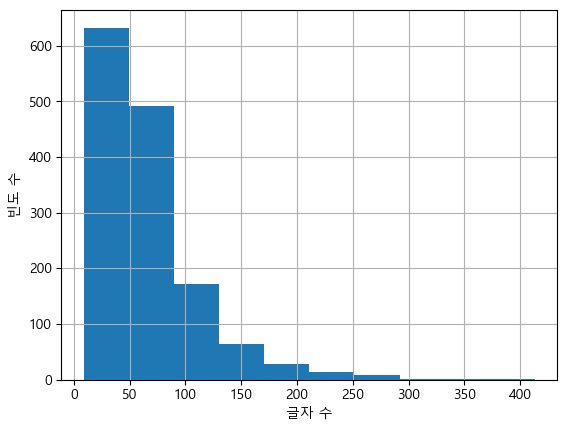

In [6]:
#판시사항의 글자 수 히스토그램
ax = df['판시사항'].str.len().hist()

ax.set_xlabel('글자 수')
ax.set_ylabel('빈도 수')

### 토큰수분포

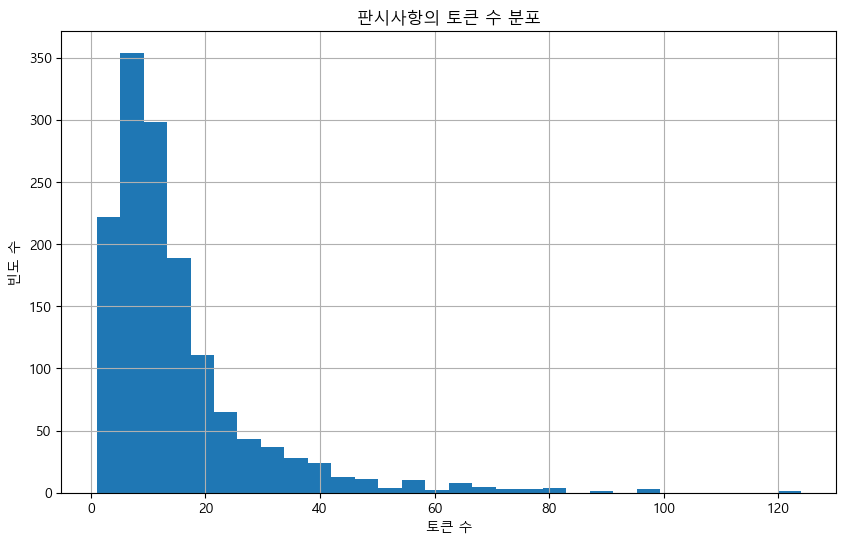

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 결측값을 빈 문자열로 채움
df['판시사항'] = df['판시사항'].fillna('없음')

# 문자열을 공백으로 분할하고, 각 리스트의 길이를 계산
token_counts = df['판시사항'].str.split(' ').map(len)

# 히스토그램 그리기
ax = token_counts.hist(bins=30, figsize=(10,6))
ax.set_xlabel('토큰 수')
ax.set_ylabel('빈도 수')
ax.set_title('판시사항의 토큰 수 분포')
plt.show()

### 명사분포

In [8]:
#기호제거
data_list = df['판시사항']
data_list = [text.replace('\r', '').replace('\n', '').replace('<br/>', '').strip() for text in data_list]
data_list

['가. 공유자의 1인이 공유물중 일부를 특정하여서 한 증여의 효력나. 부동산의 특정부분을 증여받고 그 부동산에 대하여 공동명의로 소유권등기를 마친 수인의 수증자들의 공유물분할청구 가부(소극)',
 '상속재산가액의 평가방법을 정한 구 상속세법 (1981.12.31 법률 제3474호로 개정되기 전의 것) 제9조 제1항, 같은법시행령(1981.12.31 대통령령 제10667호로 개정되기 전의 것) 제5조 제1항 규정의 취지',
 '아무런 논리적 과정의 설시 없이 단순히 믿을 수 없다든가, 믿지 않는다는 표현만에 의한 증거가치판단의 당부(소극)',
 '경영권과 함께 회사 총발행주식을 양도하는 경우, 그 거래가액을 주식의 시가로 볼 수 있는지 여부(소극)',
 '회사정리절차 개시결정이 시효중단사유인지 여부',
 '상속세법 제34조의2 제1항,           동법시행령 제41조 제2항 제2호 소정의 친족관계로 인한 특별관계에 있는 자에 해당한다고 판단한 사례',
 '등기명의인을 상대로 한 소유권보존등기 및 이전등기말소청구와 함께 제기된 소유권확인의 소의 소익유무',
 '명의수탁자가 제3자에게 부동산을 양도하고 소유권이전등기까지 마친 경우 수탁자의 신탁자에 대한 신탁해지로 인한 소유권이전등기의무의 이행불능여부(적극)',
 '명의신탁 사실을 등기 또는 등록하지 않은 경우, 구 상속세법(1981.12.31 법률 제3474호로 개정되기 전의 것) 제32조의2의 규정에 의한 증여의제의 가부',
 "부동산소유권이전등기등에관한특별조치법 제13조 제1항 제1호,           제3호 소정의 '허위의 방법으로 확인서를 발급받았거나 허위의 보증서를 작성'한 경우에 해당하지 않는다고 본 예",
 '이혼소송계속중 부부의 일방이 사망한 경우의 소송관계',
 '상속개시 1개월여 전에 한국감정원이 감정한 감정가격을 상속재산가액으로 보고한 과세처분의 적부',
 '상속인들이 피상속인이 소송능력없이 제기한 소의 소송절차를 수계한 경우, 소송능력흠결의 하자의 치유여부',
 '법인에게 증여된 부동

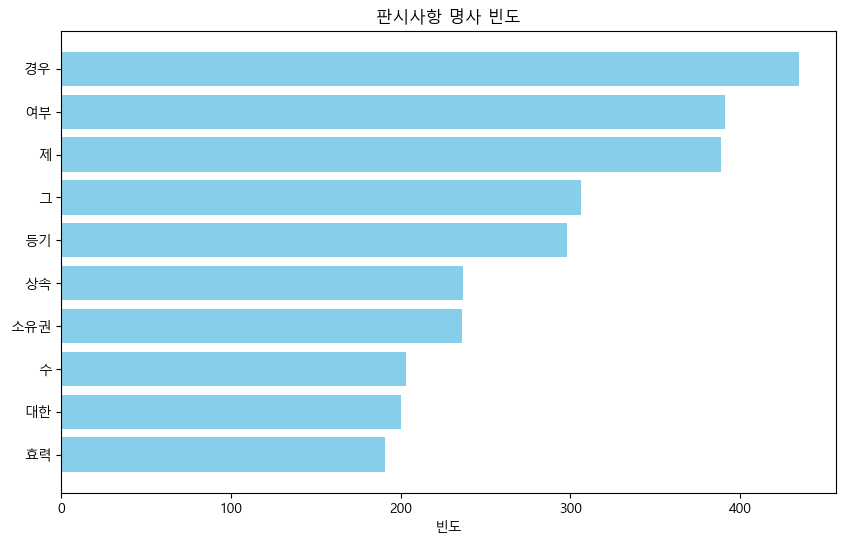

In [12]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from konlpy.tag import Okt

#명사추출
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))


# 명사를 리스트로 결합
all_nouns = ' '.join(docs_list)

# 명사 빈도 세기
noun_counts = Counter(all_nouns.split())

# 데이터프레임으로 변환
df_noun_counts = pd.DataFrame(noun_counts.items(), columns=['noun', 'count'])
df_noun_counts = df_noun_counts.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts['noun'][:10], df_noun_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판시사항 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

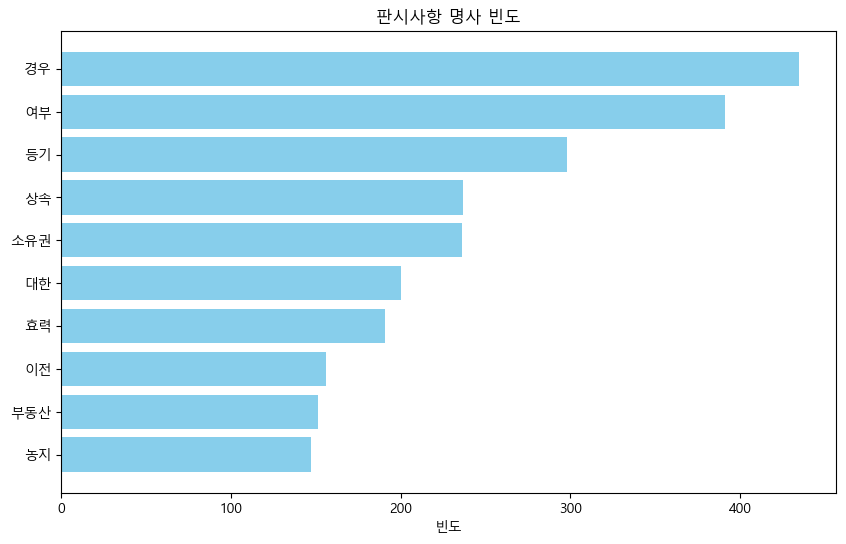

In [14]:
#2글자이상 명사비교

#명사추출
docs_list2 =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    filter_nouns = [noun for noun in nouns if len(noun) > 1]
    docs_list2.append(' '.join(filter_nouns))


# 명사를 리스트로 결합
all_nouns2 = ' '.join(docs_list2)

# 명사 빈도 세기
noun_counts2 = Counter(all_nouns2.split())

# 데이터프레임으로 변환
df_noun_counts2 = pd.DataFrame(noun_counts2.items(), columns=['noun', 'count'])
df_noun_counts2 = df_noun_counts2.sort_values(by='count', ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
plt.barh(df_noun_counts2['noun'][:10], df_noun_counts2['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판시사항 명사 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

### 형태소 분포

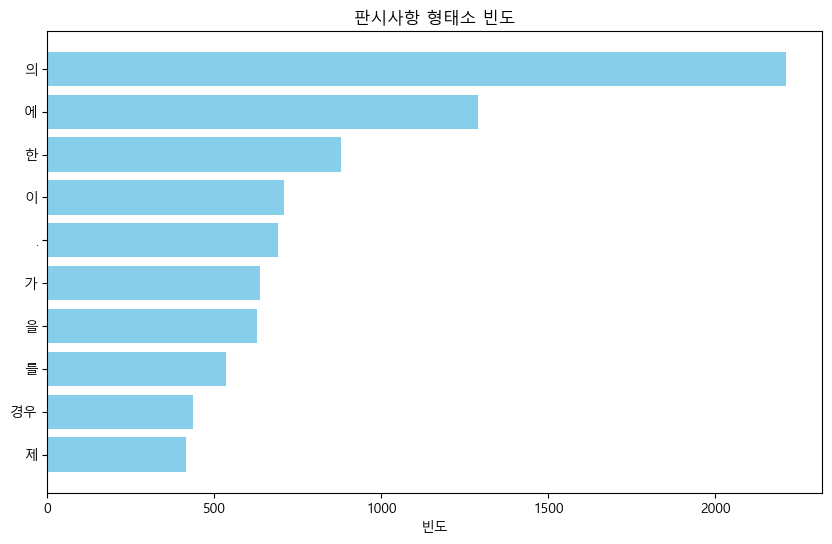

In [15]:
# 형태소 분석
docs_list = []
okt = Okt()
for text in data_list:
    morphemes = okt.morphs(text)  # 모든 형태소 추출
    docs_list.append(' '.join(morphemes))

# 형태소 문자열로 결합
all_morphemes = ' '.join(docs_list)

# 형태소 빈도 세기
morpheme_counts = Counter(all_morphemes.split())

# 데이터프레임으로 변환
df_morpheme_counts = pd.DataFrame(morpheme_counts.items(), columns=['morpheme', 'count'])
df_morpheme_counts = df_morpheme_counts.sort_values(by='count', ascending=False)


# 빈도 시각화 (상위 10개 형태소)
plt.figure(figsize=(10, 6))
plt.barh(df_morpheme_counts['morpheme'][:10], df_morpheme_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('판시사항 형태소 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

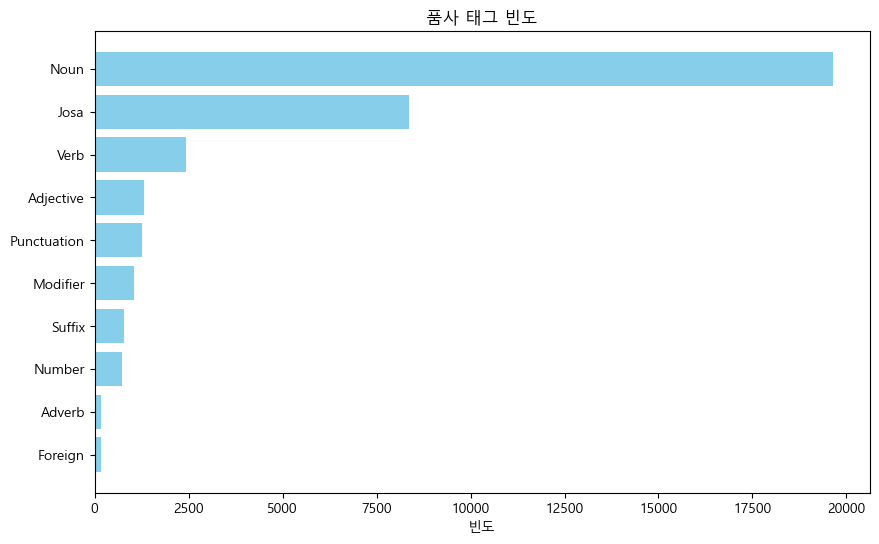

In [16]:
#형태소 품사태그확인

tag_list = []
okt = Okt()
for text in data_list:
    pos_tags = okt.pos(text)
    tags = [tag for _, tag in pos_tags]
    tag_list.extend(tags)

# 품사 태그 빈도 세기
tag_counts = Counter(tag_list)

# 데이터프레임으로 변환
df_tag_counts = pd.DataFrame(tag_counts.items(), columns=['tag', 'count'])
df_tag_counts = df_tag_counts.sort_values(by='count', ascending=False)

# 빈도 시각화 (상위 10개 품사 태그)
plt.figure(figsize=(10, 6))
plt.barh(df_tag_counts['tag'][:10], df_tag_counts['count'][:10], color='skyblue')
plt.xlabel('빈도')
plt.title('품사 태그 빈도')
plt.gca().invert_yaxis()  # 빈도순으로
plt.show()

### N-gram

In [18]:
#위에 명사추출이랑 같음
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))

In [24]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#1-gram
vect = CountVectorizer() 
dtm = vect.fit_transform(docs_list).toarray()
vocab = vect.get_feature_names_out()
df_1gram = pd.DataFrame(dtm, columns=vocab)

#2-gram
vect_2gram = CountVectorizer(ngram_range=(2, 2))
dtm_2gram = vect_2gram.fit_transform(docs_list).toarray()
vocab_2gram = vect_2gram.get_feature_names_out()
df_2gram = pd.DataFrame(dtm_2gram, columns=vocab_2gram)

#3-gram
vect_3gram = CountVectorizer(ngram_range=(3, 3))
dtm_3gram = vect_3gram.fit_transform(docs_list).toarray()
vocab_3gram = vect_3gram.get_feature_names_out()
df_3gram = pd.DataFrame(dtm_3gram, columns=vocab_3gram)

print("1-gram")
print(df_1gram)

print("2-gram")
print(df_2gram)

print("3-gram")
print(df_3gram)

1-gram
      가가  가격  가공업  가구  가능  가다가  가담  가독  가동  가등기  ...  후보  후소  후손  후의  후임  후행  \
0      0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
1      0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
2      0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
3      0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
4      0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
...   ..  ..  ...  ..  ..  ...  ..  ..  ..  ...  ...  ..  ..  ..  ..  ..  ..   
1434   0   0    0   1   0    0   0   1   0    0  ...   0   0   0   0   0   0   
1435   0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
1436   0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
1437   0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   
1438   0   0    0   0   0    0   0   0   0    0  ...   0   0   0   0   0   0   

      훈련  휴식  흠결  희극  
0      0 

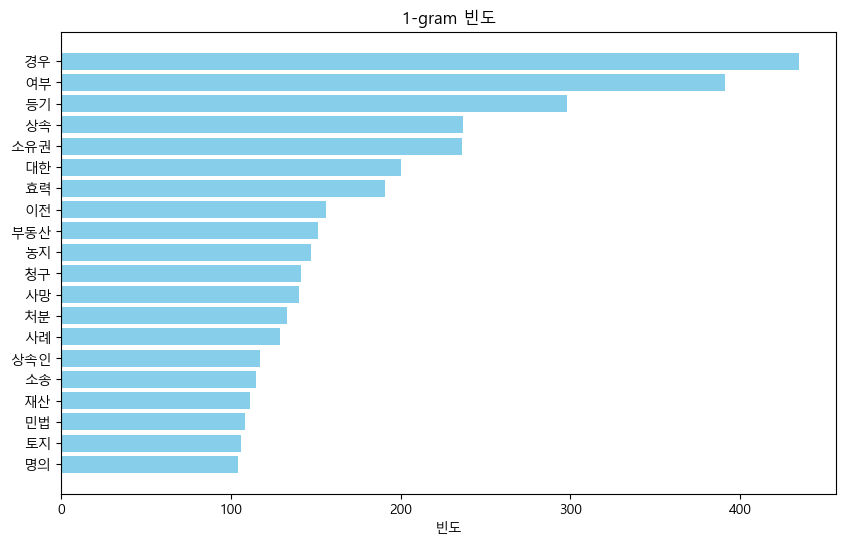

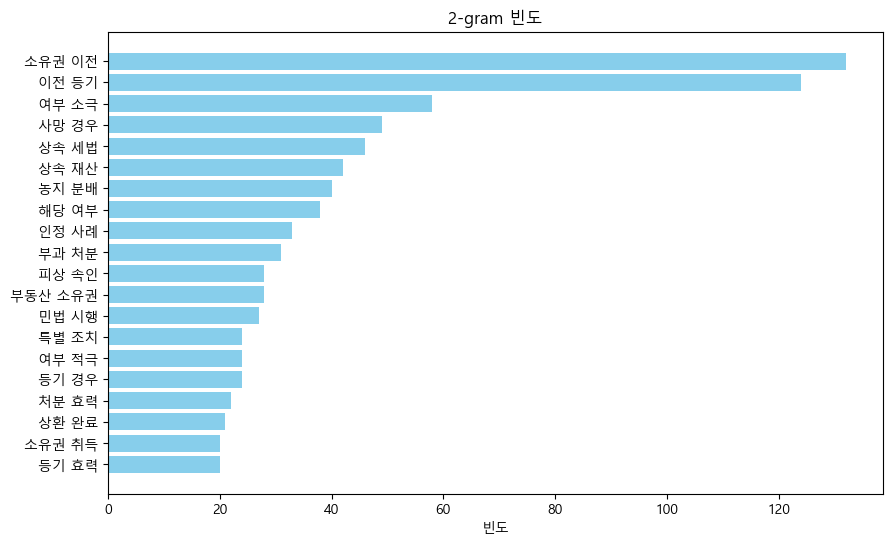

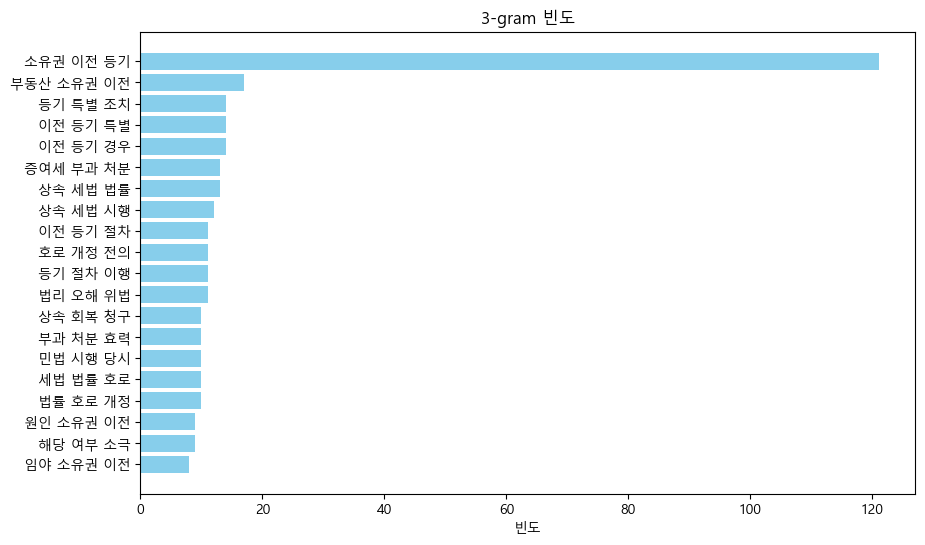

In [25]:
# 빈도수 시각화 함수
def plot_top_n(df, title, n=None):
    # 각 n-gram의 빈도 계산
    freq = df.sum().sort_values(ascending=False).head(n)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(freq.index, freq.values, color='skyblue')
    plt.xlabel('빈도')
    plt.title(title)
    plt.gca().invert_yaxis()  # 빈도순으로
    plt.show()

# 상위 20개 빈도 시각화
plot_top_n(df_1gram, '1-gram 빈도',20)
plot_top_n(df_2gram, '2-gram 빈도',20)
plot_top_n(df_3gram, '3-gram 빈도',20)

### TF-IDF, 워크클라우드(문서의 핵심단어)

In [26]:
#위에 명사추출이랑 같음
docs_list =[]

okt = Okt()
for text in data_list:
    nouns = okt.nouns(text)
    docs_list.append(' '.join(nouns))

In [30]:
#TF-IDF 벡터화
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(vocabulary=vocab)
tfidf = tfidfv.fit_transform(docs_list).toarray()
pd.DataFrame(tfidf, columns=vocab)

,가가,가격,가공업,가구,가능,가다가,가담,가독,가동,가등기,...,후보,후소,후손,후의,후임,후행,훈련,휴식,흠결,희극
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0.0,0.0,0.0,0.44219,0.0,0.0,0.0,0.44219,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1436,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
#TF-IDF중요단어추출

import numpy as np
tfidf_order = np.flip(np.argsort(tfidf, axis=-1), axis=-1)
topics =[]
n_top = 10
for line in tfidf_order:
  topic = [vocab[x] for x in line[:n_top]]
  topics.append(topic)
df = pd.DataFrame(topics)
df

,0,1,2,3,4,5,6,7,8,9
0,유물,증여,부동산,증자,특정,부분,분할,공유,일부,수인
1,호로,개정,전의,대통령령,상속,평가,취지,법률,방법,규정
2,논리,표현,과정,가치판단,당부,증거,소극,본안,부가,볼바
3,주식,거래,발행,경영,시가,회사,양도,가액,소극,여부
4,시효중단,정리,개시,회사,사유,결정,절차,여부,복멸,복귀
...,...,...,...,...,...,...,...,...,...,...
1434,호주,가구,가독,상속,남자,관계,사망,경우,희극,부과
1435,변론조서,현저,오류,재의,효력,부모,본안,부가,볼바,본인
1436,상속인,계약,매매,부와,이천,조항,증서,작성,체결,사이
1437,어업권,군정,법령,발생,성질,희극,본등기,부가가치,부가,볼바


In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud_from_tfidf(tfidf, vocab):
    # 단어별 TF-IDF 값을 저장할 딕셔너리
    word_freq = {}
    
    # 모든 문서의 TF-IDF 값을 합산
    for i in range(tfidf.shape[0]):
        for j in range(tfidf.shape[1]):
            if tfidf[i, j] > 0:  # TF-IDF 값이 0보다 클 때만
                word = vocab[j]  # 단어
                if word in word_freq:
                    word_freq[word] += tfidf[i, j]  # 기존 값에 추가
                else:
                    word_freq[word] = tfidf[i, j]  # 새로 추가
    
    # 워드클라우드 생성
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
                    width=800,
                    height=400,
                    background_color='white',
                    prefer_horizontal=0.8,
                    random_state=42,
                    colormap='viridis').generate_from_frequencies(word_freq)
    

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('전체 문서의 워드클라우드')
    plt.show()

# 전체 문서에 대한 워드클라우드 시각화
plot_wordcloud_from_tfidf(tfidf, vocab)

ModuleNotFoundError: No module named 'wordcloud'

### 코사인유사도

### 사건종류 분포

In [47]:
import pandas as pd

# CSV 파일 경로
csv_file_path1 = r'C:\Users\82102\Downloads\새 폴더 (2)\lawSearch_jh.csv' #해당하는 경로로 변경
csv_file_path2 = r'C:\Users\82102\Downloads\새 폴더 (2)\lawService_jh.csv' #해당하는 경로로 변경

# CSV 파일 불러오기
df_search = pd.read_csv(csv_file_path1)
df_service = pd.read_csv(csv_file_path2)

df_filtered = df_service[df_service.apply(lambda row: row.astype(str).str.contains('상속').any(), axis=1)]
matching_df = df_search[df_search['사건번호'].isin(df_filtered['사건번호'])]

# 불러온 데이터 확인
print(matching_df.head())

    판례일련번호                   사건명    사건번호        선고일자     법원명 사건종류명  \
40  206592            상속세등부과처분취소  84누716  1985.09.24     대법원    세무   
52  206632             법인세부과처분취소  85누208  1985.09.24     대법원    세무   
75   76241           소유권이전등기청구사건   85나14  1985.09.23  서울고등법원    민사   
76   76302         증여세부과처분취소청구사건  84구909  1985.09.23  서울고등법원    세무   
86   76233  원인무효에의한소유권이전등기말소청구사건  85나789  1985.09.12  서울고등법원    민사   

                                               판례상세링크  
40  /DRF/lawService.do?OC=znaeng110&target=prec&ID...  
52  /DRF/lawService.do?OC=znaeng110&target=prec&ID...  
75  /DRF/lawService.do?OC=znaeng110&target=prec&ID...  
76  /DRF/lawService.do?OC=znaeng110&target=prec&ID...  
86  /DRF/lawService.do?OC=znaeng110&target=prec&ID...  


In [48]:
matching_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1393 entries, 40 to 20074
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   판례일련번호  1393 non-null   int64 
 1   사건명     1393 non-null   object
 2   사건번호    1393 non-null   object
 3   선고일자    1393 non-null   object
 4   법원명     1393 non-null   object
 5   사건종류명   1393 non-null   object
 6   판례상세링크  1393 non-null   object
dtypes: int64(1), object(6)
memory usage: 87.1+ KB


In [49]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1439 entries, 21 to 20074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례정보일련번호  1439 non-null   int64 
 1   사건번호      1439 non-null   object
 2   선고        1439 non-null   object
 3   판결유형      1439 non-null   object
 4   판시사항      1412 non-null   object
 5   판결요지      1415 non-null   object
 6   참조조문      1338 non-null   object
 7   참조판례      547 non-null    object
 8   판례내용      1439 non-null   object
dtypes: int64(1), object(8)
memory usage: 112.4+ KB


In [50]:
matching_df['사건종류명'].value_counts()

사건종류명
민사      1078
세무       192
형사        47
일반행정      40
가사        36
Name: count, dtype: int64

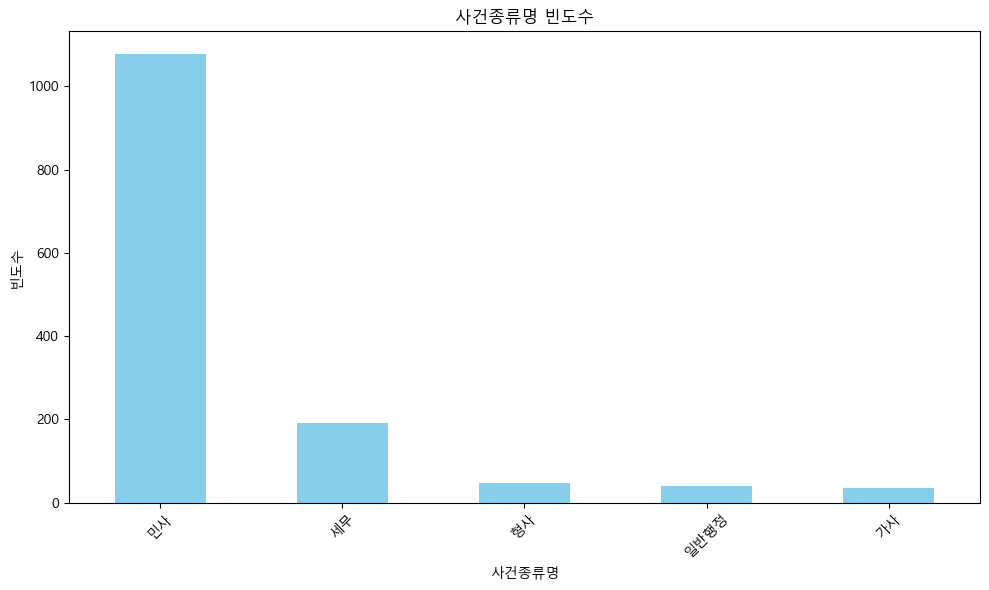

In [51]:
case_counts = matching_df['사건종류명'].value_counts()

plt.figure(figsize=(10, 6))
case_counts.plot(kind='bar', color='skyblue')
plt.xlabel('사건종류명')
plt.ylabel('빈도수')
plt.title('사건종류명 빈도수')
plt.xticks(rotation=45)
plt.tight_layout()  # 레이아웃 조정
plt.show()

### 3심까지 가는 빈도

In [61]:
# '상속'관련되었을때 3심까지 가는 빈도
matching_df['법원명'].value_counts()

법원명
대법원           805
서울고등법원        346
대구고등법원        146
광주고등법원         56
서울민사지방법원       15
수원지방법원          8
부산지방법원          4
서울가정법원          2
광주지방법원          2
전주지방법원정주지원      1
대전지방법원홍성지원      1
전주지방법원          1
마산지방법원          1
서울지방법원북부지원      1
서울형사지방법원        1
대구지방법원          1
서울지방법원남부지원      1
대전지방법원          1
Name: count, dtype: int64

In [62]:
# '상속'관련 법원명카운트(3심과 관련없는 가정법원은 포함하지않았음)
supreme_count = matching_df[matching_df['법원명'].str.contains('대법원', na=False)].shape[0]
high_count = matching_df[matching_df['법원명'].str.contains('고등', na=False)].shape[0]
local_count = matching_df[matching_df['법원명'].str.contains('지방', na=False)].shape[0]

print('상속:',supreme_count,high_count,local_count)

# 전체 법원명카운트
total_supreme_count = df_search[df_search['법원명'].str.contains('대법원', na=False)].shape[0]
total_high_count = df_search[df_search['법원명'].str.contains('고등', na=False)].shape[0]
total_local_count = df_search[df_search['법원명'].str.contains('지방', na=False)].shape[0]

print('전체:',total_supreme_count,total_high_count,total_local_count)

상속: 805 548 38
전체: 15070 4698 300


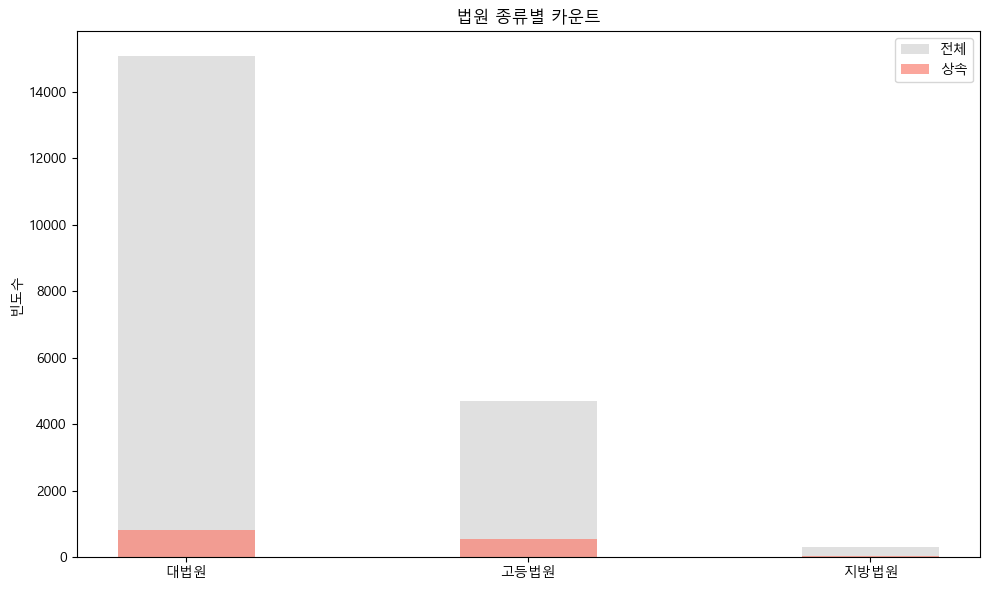

In [70]:
court_types = ['대법원', '고등법원', '지방법원']
court_counts = [supreme_count, high_count, local_count]
total_counts = [total_supreme_count, total_high_count, total_local_count]

# 바그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(court_types, total_counts, width=0.4, label='전체', color='lightgrey', alpha=0.7)
plt.bar(court_types, court_counts, width=0.4, label='상속', color='salmon', alpha=0.7)

plt.ylabel('빈도수')
plt.title('법원 종류별 카운트')
plt.legend()
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [ ]:
### 재판결과와 판결요지 길이의 상관관계